# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [29]:
# Your work here.

In [221]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [31]:
df = pd.read_csv('data/human_body_temperature.csv')

In [32]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


#### 1. Is the distribution of body temperatures normal?


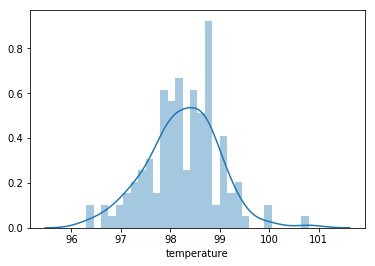

In [33]:
sns.distplot(df['temperature'], bins=30);

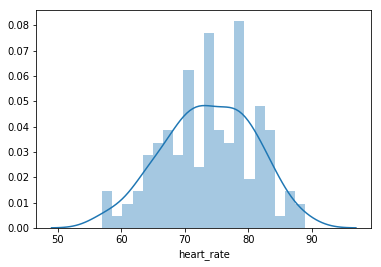

In [34]:
sns.distplot(df['heart_rate'], bins=20)

In [35]:
def ecdf(data):
    ''' takes the data and returns the x and y values where x is the sorted data and
    y is the cumulative proportion of the distribution of data. The result can be used for 
    plotting an empirical cumulative distribution function (ECDF).
    '''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y    

In [36]:
t1, t2 = ecdf(df['temperature'])
h1,h2 = ecdf(df['heart_rate'])

In [37]:
# define an array of percentiles
percentiles = np.array([2.5,25,50,75,97.5])

temp_percentile = np.percentile(df['temperature'], percentiles).round(1)
hr_percentile = np.percentile(df['heart_rate'],percentiles).round(1)

In [38]:
# get the µ and sd of the distribution to replicate the value in normal dist.
sd_temp = np.std(df['temperature'])
mu_temp = np.mean(df['temperature'])
sd_hr = np.std(df['heart_rate'])
mu_hr = np.mean(df['heart_rate'])

In [63]:
# create a normally distributed data based on the means and standard deviations 
# of the observed data. 
np.random.seed(42)
temp_normal = np.random.normal(mu_temp,sd_temp,10000)
hr_normal = np.random.normal(mu_hr,sd_hr,10000)

In [64]:
# create the x and y values of the theoretical (normal) distribution. 
t1_theor, t2_theor = ecdf(temp_normal)
h1_theor, h2_theor = ecdf(hr_normal)

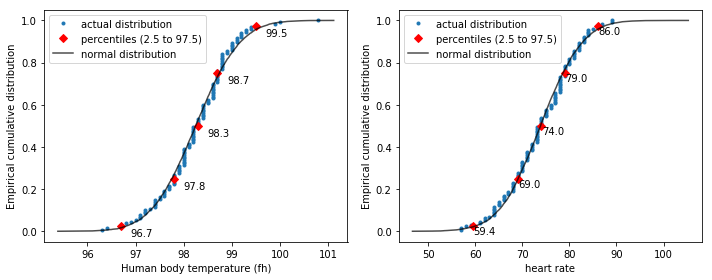

In [71]:
# plot the empirical cumulative distribution function, 
# actual percentiles (2.5, 25, 50, 75, 97.5) and the theoretical normal distribution 
# cumulative values. 
fig, [ax1, ax2] = plt.subplots(1,2,figsize=(10,4))
ax1.plot(t1,t2,marker='.', linestyle='none', label='actual distribution')
ax1.plot(temp_percentile,percentiles/100,marker='D',
         color='red', linestyle='none', label='percentiles (2.5 to 97.5)')
ax1.plot(t1_theor,t2_theor, color='k', label='normal distribution', alpha=0.7)
ax1.set_xlabel('Human body temperature (fh)')
ax1.set_ylabel('Empirical cumulative distribution');
ax1.legend()
for i,j in zip(temp_percentile,percentiles):
    ax1.annotate(str(i),xy=(i+0.2,j/100-0.05))
    
ax2.plot(h1,h2,marker='.', linestyle='none',label='actual distribution')
ax2.plot(hr_percentile,percentiles/100,marker='D', 
         color='red', linestyle='none', label='percentiles (2.5 to 97.5)')
ax2.plot(h1_theor,h2_theor, color='k',label='normal distribution', alpha=0.7)
for i,j in zip(hr_percentile,percentiles):
    ax2.annotate(str(i),xy=(i+0.2,j/100-0.04))

ax2.set_xlabel('heart rate')
ax2.set_ylabel('Empirical cumulative distribution');
ax2.legend()
plt.tight_layout()

#### Discussion
Data seem approximately normally distributed, especially for the hear rate. Body temperature data seem to have a left skew (most of the data is slightly higher than the theoretical normal distribution).

**2. Is the sample size large? Are the observations independent?**
* Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

#### Answer
* Since the data is about biological measurements, the underlying population data should be normally distributed. The sample size of 390 observations is large enough. 
* the observations are independent among the variables. but there might be some correlation between the body temperature and heart rate, so we cannot rule out dependence between these 2 variables.

***Ask Shmuel about this. Are they asking about the independence between heart rate and temperature or independence among the different observations?***

above 20 samples is large enough. 

t statistic = std / n for population. but if you have only the sample, t = std / (n-1). if the 1 is making a big difference in the denominator, than this number is not large enough. 

**3. Is the true population mean really 98.6 degrees F?**
* First, try a bootstrap hypothesis test. 

#### Answer

##### Hypothesis testing
* H0: the population mean is not significantly different from 98.6 degrees.
* H1: It IS different.

We need to construct a two-tail hypothesis test using bootstrapping. 

##### t-statistic vs z-statistic
When we don't know the actual parameters of the population distribution (mean, std), we need to use the **t-statistic**.

* H0: there is no difference between the sample mean and the population mean (estimated using bootrsapping of 10,000 samples)
* H1: there is difference between the sample mean and the population mean. 

To test the null hypothesis we do the following steps:
1. Create bootstrap samples (10,000) from the given sample.
2. Compute the fraction of the bootstrap sample means that are more than or equal to 98.6. This will give us the p-value. 
3. Reject the null hypothesis if the p value is less than 0.05 (95% confidence level).

In [102]:
# Bootstrap hypothesis test:
# Create a bootstrapping sample from the existing sample and check what is the probability
# that we can get a value as extreme or more than the observed mean.

def bootstrap_means(data, size):
    '''
    Recreate the sample by drawing a random item from the sample with replacement, 
    creating a sub-set in the size of the original sample from the randomly selected items,
    taking their means and appending these means to a numpy array. 
    '''
    bootstrap = np.empty(size)
    for i in range(size):
        bootstrap[i] = np.mean(np.random.choice(data, len(data)))
    return bootstrap

In [149]:
# create a sample of theoretical means using bootstraping.
boot_means_temp = bootstrap_means(df['temperature'], 10000)

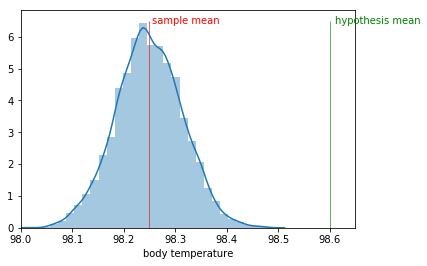

In [222]:
fig, ax = plt.subplots()
sns.distplot(boot_means_temp, bins=30, ax=ax);
ax.vlines(np.mean(df['temperature']),0,6.5, color='red', linewidth=0.6);
ax.vlines(98.6,0,6.5, color='green', linewidth=0.6);
ax.annotate('sample mean', xy=(98.255,6.4), color='red');
ax.annotate('hypothesis mean', xy=(98.61,6.4),color='green')
ax.set_xlim(98,98.65)
ax.set_xlabel('body temperature');

In [218]:
np.round(df['temperature'].mean(),2)

98.25

In [243]:
# The fraction of the observed mean and values smaller than that over the entire data (means)
p = np.sum(boot_means_temp >= 98.6)/len(boot_means_temp)
p

0.0

#### Discussion: hypothesis testing

* the p-value of the result is around 0, which suggests that we should reject the null hypothesis that the true body temperature is 98.6. 

#### Question 3 continued
* Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the t or z statistic? 

Hypothesis testing

* H0: true population mean is the same as the sample mean (98.25)
* H1: true population mean is different from the sample mean. 

In [165]:
temp = df['temperature']

In [186]:
temp_mean = np.round(temp.mean(),2)
temp_std = np.std(temp)
n = temp.size

In [187]:
se = temp_std/(np.sqrt(n))
se

0.06405661469519336

In [220]:
# if the H0 is true, than the true mean is equal to sample mean.
# hence, the numerator of this expression is just the samplea mean: t = (x - μ) / SE 
t = (98.6 - temp_mean)/se
t

5.4639165941789525

In [240]:
temp_mean

98.25

#### Answer
* We would use one sample test because we do not have a second sample data. 
* Since the body temperature is a natural phenomenon, it is most probably normally distributed. However, we do not have the population parameters, that's why we will use the sample parameters (mean and std). Therefore, t-statistic is more correct to use. 
* the 95% confidence level t statistic is 1.96. The t statistic that we got is 5.46, which means that the probability of 98.6 being the true population mean is even less than 0.5%.

* Now try using the other test. How is the result be different? Why?

In [241]:
# do a z test:
z_score = (98.6 - temp_mean)/se
z_score

5.4639165941789525

##### Answer
The z-score of 5.46 corresponds to a probability of less than 1% that the true mean is equal to 98.6. So we can reject the null hypothesis with more than 99% confidence level. 

When the sample size is large, the t score and the z score are very similar. 

##### Question 4

* Draw a small sample of size 10 from the data and repeat both frequentist tests.
* Which one is the correct one to use?
* What do you notice? What does this tell you about the difference in application of the  t  and  z  statistic?

In [251]:
# Draw a small sample of size 10 from the data and repeat both frequentist tests.
small_temp = np.random.choice(temp,10)

In [252]:
# create mean and std and standard error of the sample to be used in the t and z tests.
small_mean = np.mean(small_temp)
small_std = np.std(small_temp)
small_se = small_std/np.sqrt(small_temp.size)

In [253]:
# t-test
t = (98.6-small_mean)/small_se
t

1.5223149548349326

In [254]:
# z-test
z = (98.6-small_mean)/small_se
z

1.5223149548349326

##### Discussion
z statistic = 1.52, p value calculated using the z table is 1-0.9357 = 0.064. This is larger than the 0.05 p value that we use to reject the null, so we are not able to reject the null hypothesis that the mean is 98.6. 

t statistic of 1.52 and 9 degrees of freedom gives us a p value of betweem 0.1 to 0.2. It is larger than the p value obtained from the z table. Both tests fail to reject the null. 

##### Question 5

* At what temperature should we consider someone's temperature to be "abnormal"?
    * As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    * Start by computing the margin of error and confidence interval. 
    * When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [277]:
# Compute a 95% confidence interval of the bootstrapped sample means.
mean_of_means = np.mean(boot_means_temp).round(2)
mean_of_means

# Standard error of the sample mean = st. deviation of the sample / sqrt(n)
# 95% of the data will fall witin 2 standard errors away from the mean in both directions.
# thus, the marging of error is 2 * se
margin_of_error = 2*se # for 95% confidence interval
margin_of_error

conf_int = np.array([mean_of_means-margin_of_error,mean_of_means+margin_of_error]).round(2)
conf_int

array([98.12, 98.38])

In [412]:
# calculate the 95% confidence interval of the bootstrap sample means. 
conf_int_bootstraps = np.percentile(boot_means_temp,[2.5,97.5]).round(2)
conf_int_bootstraps

array([98.12, 98.37])

##### Discussion
* The confidence intervals calculated from the bootstrapped samples and the frequentist approach are almost identical.

##### Question 6
* Is there a significant difference between males and females in normal temperature?
* What testing approach did you use and why?
* Write a story with your conclusion in the context of the original problem.

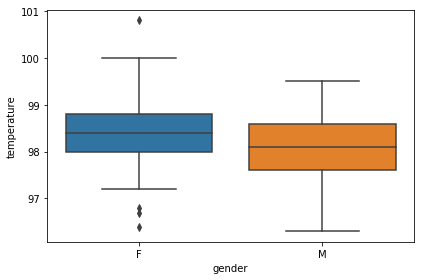

In [435]:
# swarmplot of the temperature and heart rate values based on gender.
fig, ax = plt.subplots()
sns.boxplot(x='gender',y='temperature', data=df, ax=ax);
plt.tight_layout()

##### Graphical analysis
* From the swarmplot above we can see that the female body temperature is slightly higher and the variance is higher as well. 

##### Hypothesis testing
To test whether or not there is a significant difference between male and female body temperatures, we can do the following tests:
* two-sample hypothesis testing: 
    * take the difference between the means of female - male temperatures
    * H0: the difference is 0
    * H1: difference is greater than 0. 
* Bootstrapping permutation
    * Concatinate the male and female body temperatures into a single array.
    * The use np.random.permutation() function to scrample the combined data.
    * Then randomly divide this concatenated data into 2 to simulate male and female with the assumption that these 2 populations are similarly distributed.
    * Take difference between these 2 samples
    * Do this 1000 times via bootstrapping.
    * calculate the fraction of the mean of differences that are as large or larger than the original sample's mean of differences. This is the p value based on which we reject or fail to reject the null hypothesis.

In [439]:
fem = df['temperature'][df['gender']=='F']
male = df['temperature'][df['gender']=='M']

In [452]:
fem_mean = np.mean(fem)
male_mean = np.mean(male)
gender_diff_mean = fem_mean-male_mean
gender_diff_mean

0.289230769230727

In [453]:
gender_diff = fem.values - male.values
gender_diff

array([ 1.5, -0.8,  1.2, -0.8,  0.2,  0.4, -0.6, -1.5,  0.1, -0.6,  1. ,
        0.2, -1.1, -0.2, -0.6, -1.5, -1.3, -0.7, -0.7, -0.5, -0.5,  1.2,
        1.6,  0.5,  1. ,  1.2, -0.1,  0. ,  1. ,  0.4, -0.4,  1.7, -0.4,
       -0.2, -0.6, -0.1, -0.9, -1.1, -0.4,  1.4,  1.6,  0.6,  1.1,  2.9,
        0.8, -1.9,  1.8,  0.9,  1.7,  0.2,  1.4, -0.3,  0.3,  0.4,  1.5,
        2.1,  2.2,  0.5, -0.6, -0.3, -0.8,  1.5,  0.9,  0.5,  0.8])

In [456]:
gender_diff_se = np.std(gender_diff)/np.sqrt(len(df))
gender_diff_se

0.09053585483370011

In [458]:
# t statistic:
t = (gender_diff_mean-0)/gender_diff_se
t

3.194654424614399

In [482]:
# create a function to get permutated samples. 

def perm_sample(data1, data2):
    ''' Concatenate male and female, scramble, and divide by 2 to replicate a scenario 
    when there is no difference in the distribution of these 2 populations. 
    '''
    combined = np.concatenate([data1,data2])
    scrambled = np.random.permutation(combined)
    perm_1 = scrambled[:len(data1)]
    perm_2 = scrambled[len(data1):]
    return perm_1, perm_2

In [484]:
perm_fem, perm_male = perm_sample(fem, male)

In [491]:
def bootstrap_permut_samples(data1, data2, size):
    ''' Create a bootstrapping sample of the data1 and data2 by creating permutations
    from them, taking the means of the permutations, calculating the difference and 
    assiging the difference to an array.
    '''
    perm_sample_diff_means = np.empty(size)
    for i in range(size):
        boot1 = np.random.choice(data1, size=len(data1))
        boot2 = np.random.choice(data2, size=len(data2))
        perm_1, perm_2 = perm_sample(boot1,boot2)
        perm_sample_diff_means[i] = np.mean(perm_1) - np.mean(perm_2)
    return perm_sample_diff_means

In [486]:
diff_perm_samples = bootstrap_permut_samples(fem,male,1000)

In [490]:
p_perm = np.sum(diff_perm_samples >= gender_diff_mean)/diff_perm_samples.size
p_perm

0.011

##### Discussion
* t-test method: The t value of the temperature differences in genders suggest that if the null hypothesis is correct (there is no difference in body temperatures) the probability of observing the current difference purely by chance is about 1-2%, which is less than the 5% typically used for hypothesis testing. Thus, we can reject the hypothesis that there is no difference in temperature values.
* bootstrapping method: the p-value is 0.011, which is lower than 5% so we reject the null hypothesis. 